In [3]:
import os
import re

# 데이터셋 디렉토리 지정
data_dir = "/data/seungmin/dataset/k-12/Training-label"

# 말더듬음 제거 함수
def remove_stutters(text):
    return re.sub(r"\b[a-zA-Z]+/", "", text)

''''''
# 숫자 또는 영어가 포함되었는지 확인하는 함수
def has_number_or_english(text):
    return bool(re.search(r'[A-Za-z0-9]', text))

# 숫자와 영어가 모두 포함되었는지 확인하는 함수
def has_both_number_and_english(text):
    has_number = bool(re.search(r'[0-9]', text))
    has_english = bool(re.search(r'[A-Za-z]', text))
    return has_number and has_english  # 둘 다 포함될 때만 True
''''''

# 필터링된 파일 카운트
filtered_files = []

for root, _, files in os.walk(data_dir):
    for file in files:
        if file.endswith('.txt') and not file.startswith('._'):
            with open(os.path.join(root, file), 'r', encoding='utf-8') as f:
                text = f.read().strip()
                processed_text = remove_stutters(text)
                
                # 숫자 or 영어
                # if has_number_or_english(processed_text):
                
                # 숫자 and 영어
                if has_both_number_and_english(processed_text):  # 숫자+영어 포함된 경우만 카운트
                    
                    filtered_files.append(os.path.join(root, file))

print("숫자 and 영어가 포함된 파일의 개수:", len(filtered_files))
print("샘플:", filtered_files[:5])


숫자 and 영어가 포함된 파일의 개수: 47134
샘플: ['/data/seungmin/dataset/k-12/Training-label/D02/H02/S000048/000461.txt', '/data/seungmin/dataset/k-12/Training-label/D02/H02/S000048/000104.txt', '/data/seungmin/dataset/k-12/Training-label/D02/H02/S000048/000218.txt', '/data/seungmin/dataset/k-12/Training-label/D02/H02/S000048/000196.txt', '/data/seungmin/dataset/k-12/Training-label/D02/H02/S000048/000333.txt']


In [2]:
import os
import re

# 데이터셋 디렉토리 지정
data_dir = "/data/seungmin/dataset/k-12/Training-label"

# 말더듬음 제거 함수
def remove_stutters(text):
    return re.sub(r"\b[a-zA-Z]+/", "", text)

''''''
# 숫자 또는 영어가 포함되었는지 확인하는 함수
def has_number_or_english(text):
    return bool(re.search(r'[A-Za-z0-9]', text))

# 숫자와 영어가 모두 포함되었는지 확인하는 함수
def has_both_number_and_english(text):
    has_number = bool(re.search(r'[0-9]', text))
    has_english = bool(re.search(r'[A-Za-z]', text))
    return has_number and has_english  # 둘 다 포함될 때만 True

''''''
# 필터링된 파일 카운트
filtered_files = []

for root, _, files in os.walk(data_dir):
    for file in files:
        if file.endswith('.txt') and not file.startswith('._'):
            with open(os.path.join(root, file), 'r', encoding='utf-8') as f:
                text = f.read().strip()
                processed_text = remove_stutters(text)
                
                # 숫자 or 영어
                if has_number_or_english(processed_text):
                
                # 숫자 and 영어
                # if has_both_number_and_english(processed_text):  # 숫자+영어 포함된 경우만 카운트
                    
                    filtered_files.append(os.path.join(root, file))

print("숫자 or 영어가 포함된 파일의 개수:", len(filtered_files))
print("샘플:", filtered_files[:5])


숫자 or 영어가 포함된 파일의 개수: 107883
샘플: ['/data/seungmin/dataset/k-12/Training-label/D02/H02/S000048/000264.txt', '/data/seungmin/dataset/k-12/Training-label/D02/H02/S000048/000461.txt', '/data/seungmin/dataset/k-12/Training-label/D02/H02/S000048/000104.txt', '/data/seungmin/dataset/k-12/Training-label/D02/H02/S000048/000415.txt', '/data/seungmin/dataset/k-12/Training-label/D02/H02/S000048/000218.txt']


📌 총 wav 파일 수: 1382
count    1382.000000
mean        8.298263
std         3.813924
min         0.887312
50%         7.967688
95%        14.707934
99%        18.920300
max        24.480000
Name: speech_length, dtype: float64


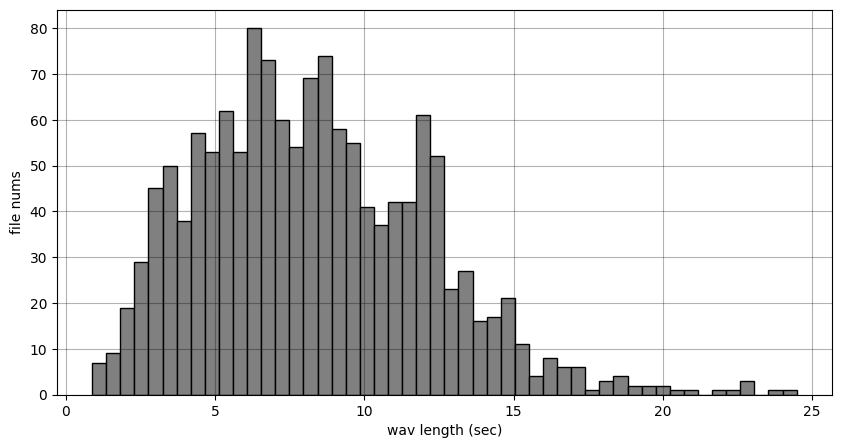

❌ 오류 발생 파일 수: 0


In [17]:
import os
import torchaudio
import pandas as pd
import matplotlib.pyplot as plt

# 디렉토리 경로
data_dir = "/data/seungmin/dataset/k12_validation_processed/number_and_english"

# 길이 저장 리스트
wav_lengths = []
error_files = []

# 파일 순회
for file in os.listdir(data_dir):
    if file.endswith(".wav"):
        wav_path = os.path.join(data_dir, file)
        try:
            waveform, sample_rate = torchaudio.load(wav_path)
            duration = waveform.shape[1] / sample_rate  # 초 단위
            wav_lengths.append(duration)
        except Exception as e:
            print(f"⚠️ 오류 발생: {file} - {e}")
            error_files.append(file)

# 통계 및 시각화
df = pd.DataFrame({"speech_length": wav_lengths})
print("📌 총 wav 파일 수:", len(wav_lengths))
print(df["speech_length"].describe(percentiles=[0.95, 0.99]))

import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.figure(figsize=(10, 5), facecolor="white")  # ← 배경 흰색 지정
plt.hist(
    df["speech_length"],
    bins=50,
    edgecolor="black",
    color="gray",       # ← 막대 색 회색
    alpha=1.0
)
plt.xlabel("wav length (sec)")
plt.ylabel("file nums")
plt.grid(color="black", alpha=0.3)
plt.show()


print(f"오류 발생 파일 수: {len(error_files)}")
if error_files:
    print("오류 예시:", error_files[:5])
